<a href="https://colab.research.google.com/github/ryakkalauncc/3162project4/blob/main/ITCS3162Project4Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Instructions: For Project 4, the goal is to get some experience working with clustering.

You have the freedom to define your own problem and choose a dataset. However, your problem definition needs to relate to clustering.

The writing will be critical here, as the main goal will be to discuss your process, why you take certain steps (e.g., what preprocessing steps and why), and tell a story around your data and insights gained through both modeling (working with the clustering algorithms we learned about) and visualizations. Thus, your writing should portray your critical thinking about the data, the process, and what knowledge you find.



**Introduce the problem:**
The goal of this project is to use clustering techniques to group songs from spotify based on their audio features. By identifying clusters of similar tracks, we aim to uncover patterns in music characteristics such as tempo, energy, danceability, and valence. These clusters could help understand different musical styles and provide unexpected insights into how songs relate to one another.

**What is clustering and how does it work?**
Explain what clustering is and how it works (e.g., k-means and/or agglomerative that we have gone over in class).

**Introduce the data:**
I found the dataset "[spotify songs](https://www.kaggle.com/datasets/sujaykapadnis/spotify-songs)" on Kaggle. The features of the datset includes 28,356 different songs with different features about each track including, track_popularity, danceability, energy, key, loudness, mode, speechiness, tempo and more. Each track has a unique track_id identifier and a track_album_id as well.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

**Data Understanding/Visualization**
Use methods to try to further understand and visualize the data. Make sure to remember your initial problems/questions when completing this step.
While exploring, does anything else stand out to you (perhaps any surprising insights?)

**How does this step relate to your modeling?**

In [29]:
df= pd.read_csv('spotify_songs.csv')

In [30]:
print("Basic Information:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  

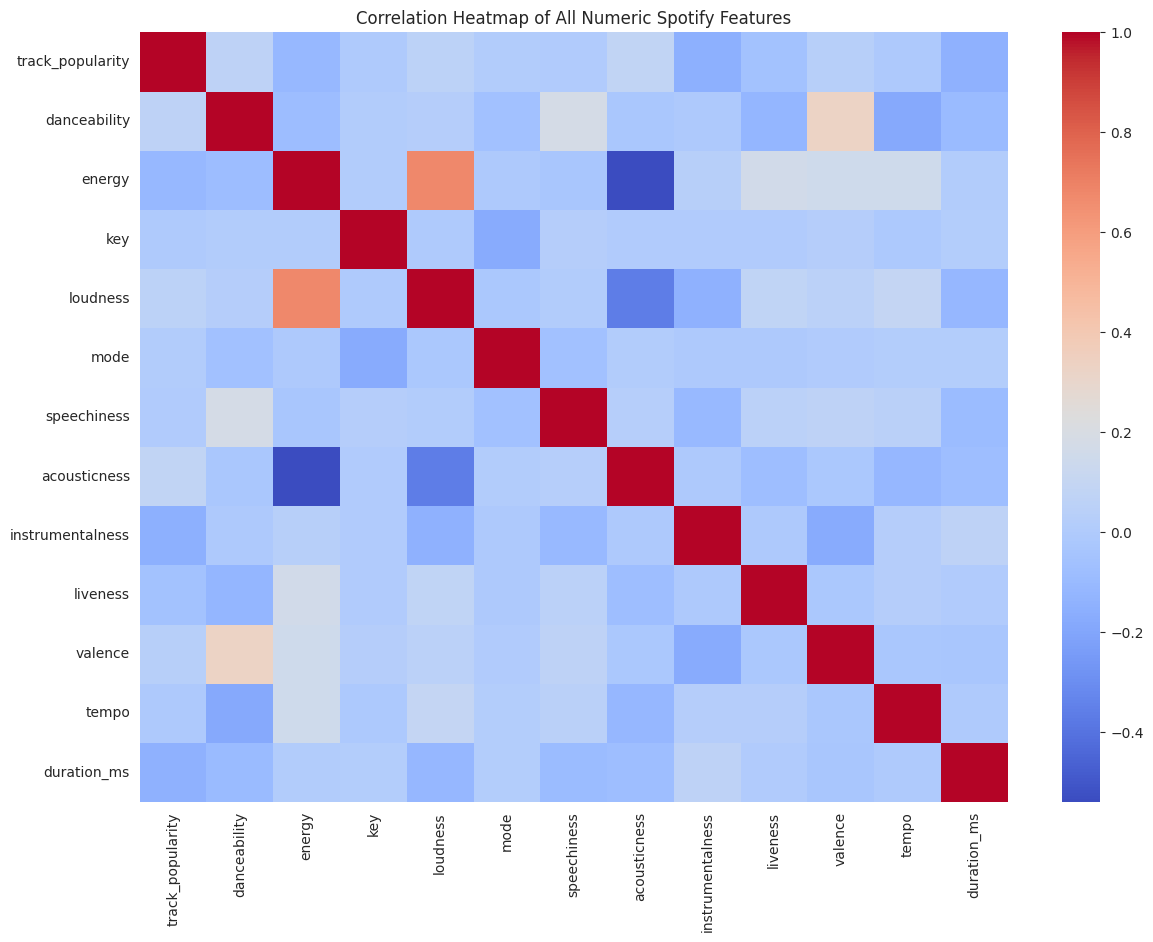

In [31]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True),annot = False, cmap="coolwarm")
plt.title("Correlation Heatmap of All Numeric Spotify Features")
plt.show()

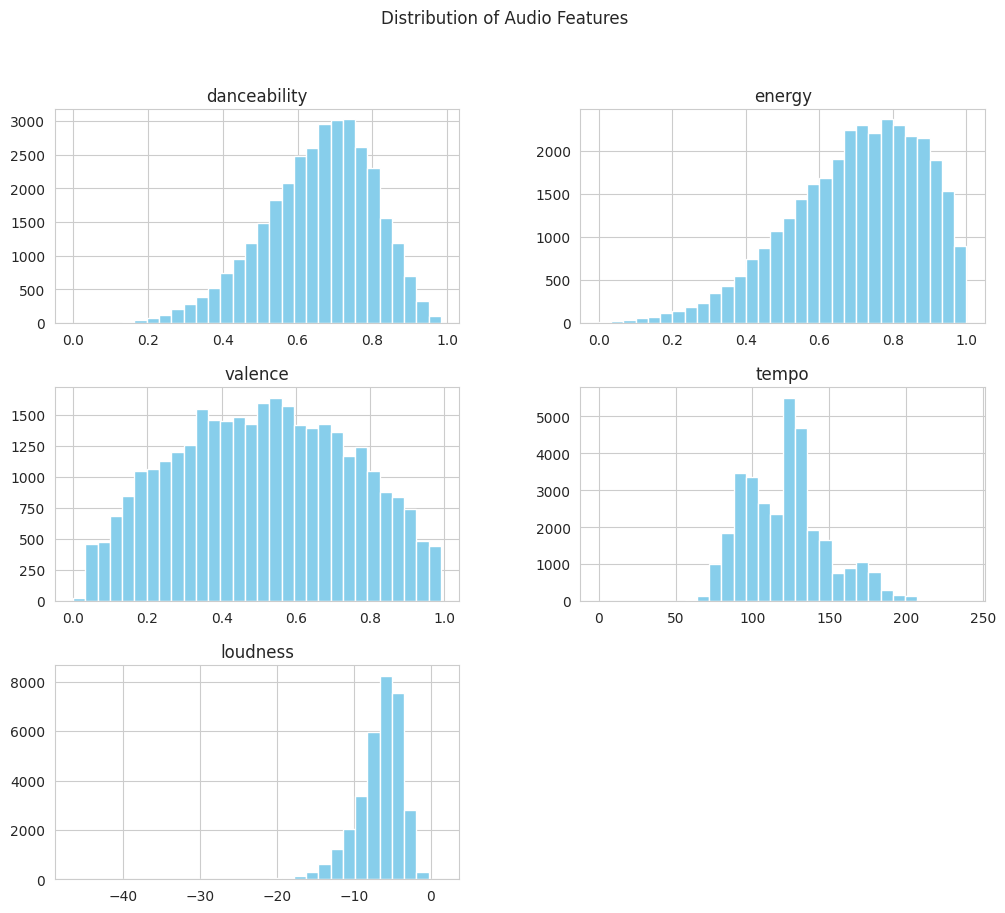

In [32]:
audio_features = ["danceability","energy","valence","tempo","loudness"]
sns.set_style("whitegrid")
df[audio_features].hist(figsize=(12,10),bins=30,color="skyblue")
plt.suptitle("Distribution of Audio Features")
plt.show()

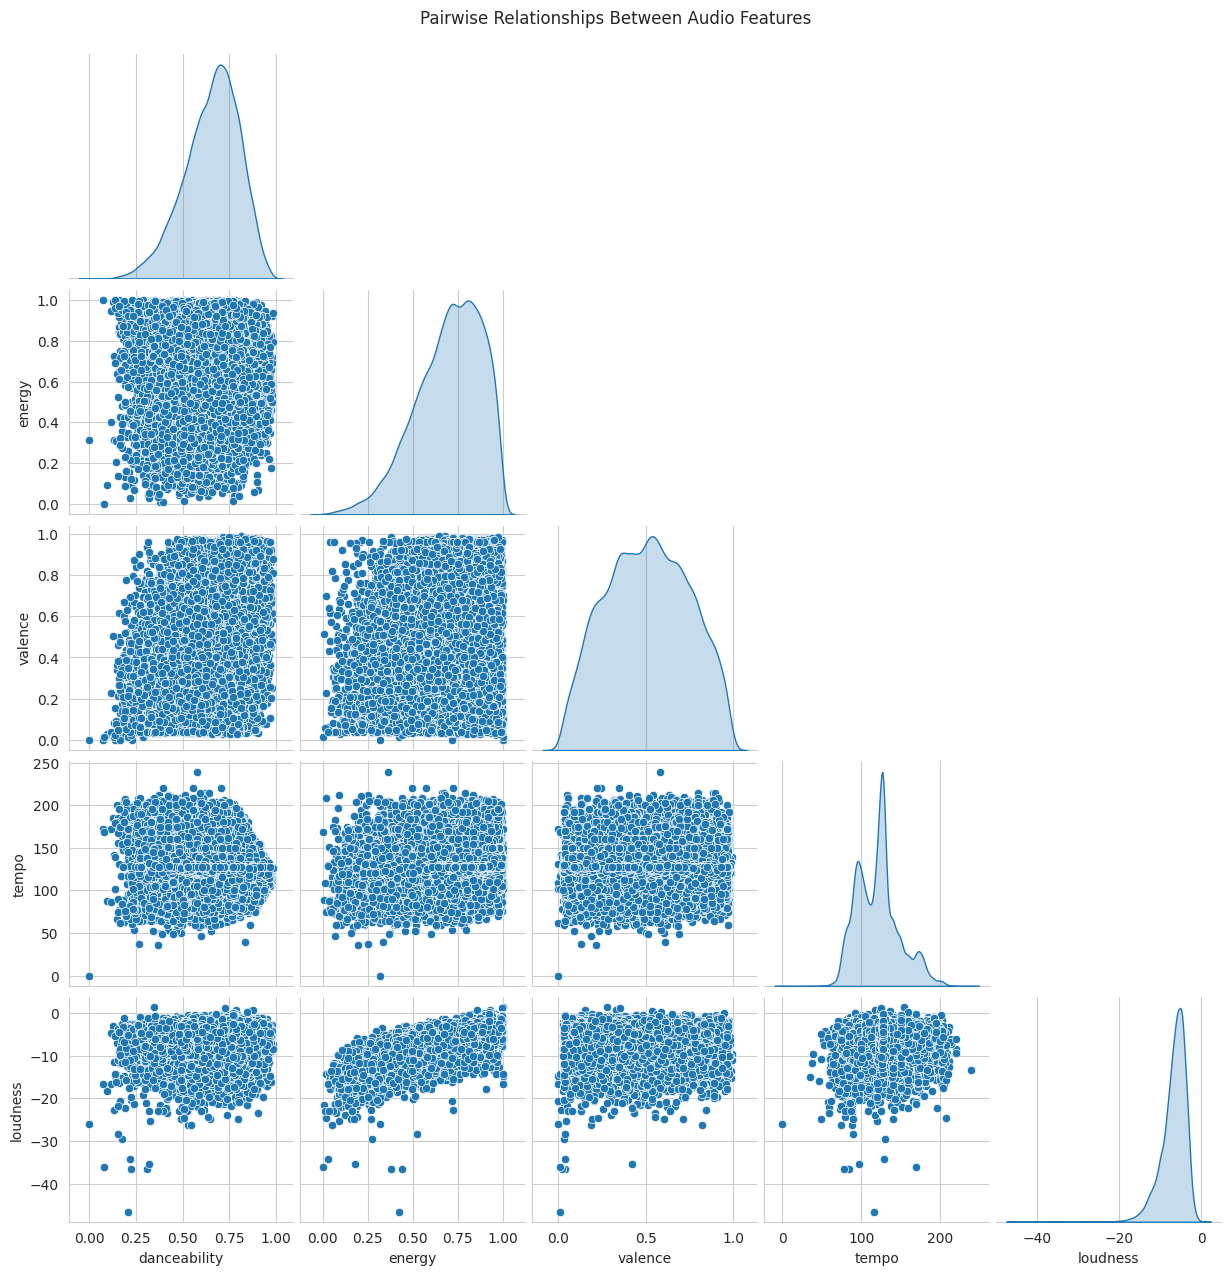

In [33]:
sns.pairplot(df[audio_features], diag_kind="kde", corner = True)
plt.suptitle("Pairwise Relationships Between Audio Features", y=1.02)
plt.show()

/tmp/ipython-input-2606491780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x = "playlist_genre", y="energy", palette="Set2")


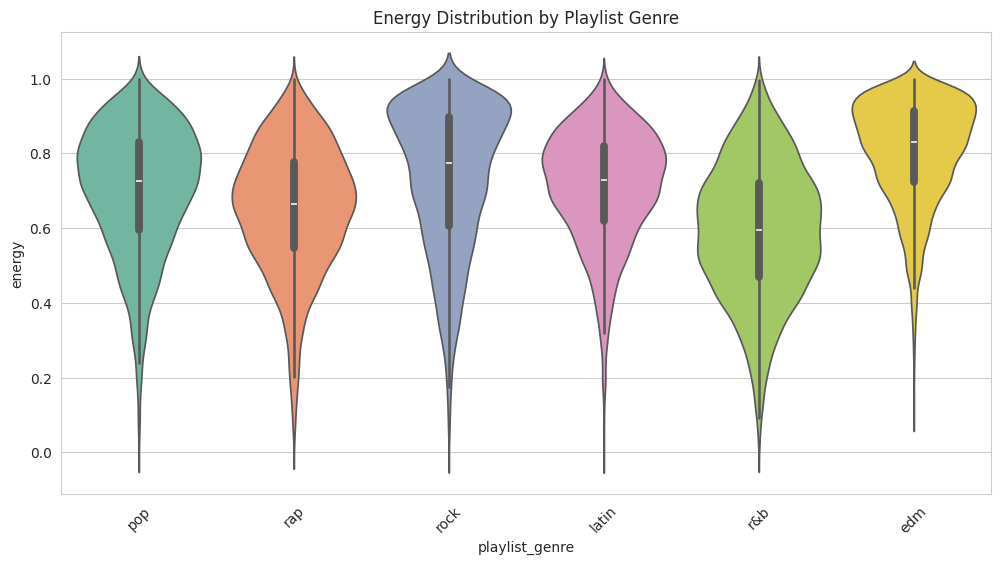

In [34]:
if "playlist_genre" in df.columns:
    plt.figure(figsize=(12,6))
    sns.violinplot(data=df, x = "playlist_genre", y="energy", palette="Set2")
    plt.title("Energy Distribution by Playlist Genre")
    plt.xticks(rotation=45)
    plt.show()

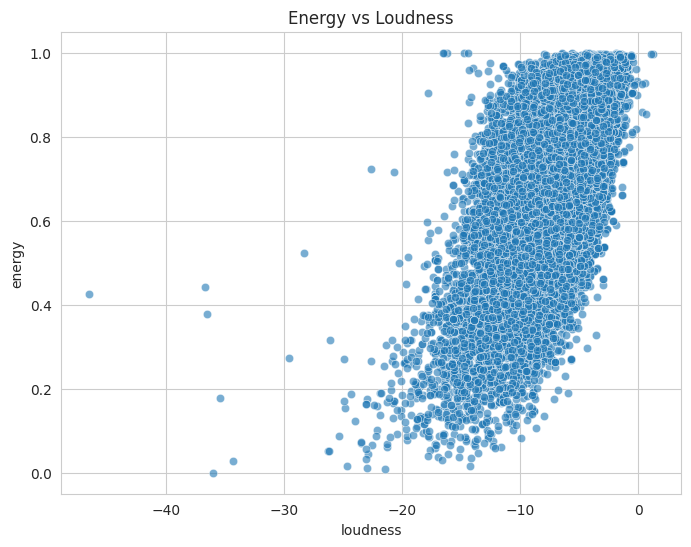

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="loudness",y="energy",alpha=0.6)
plt.title("Energy vs Loudness")
plt.show()

**Pre-processing the data**
What pre-processing steps do you follow? Explain why you do each pre-processing step.


In [36]:
features=df[audio_features]
features = features.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

**Modeling (Clustering)**
What model(s) do you use to try to solve your problem? Why do you choose those model(s)?

For example, why choose k-means over agglomerative, or vice versa? Or perhaps experiment with both and discuss the pros/cons of each? You may also try experimenting with other methods of clustering not discussed in class.

In [37]:
sil_scores = []
k_values = range(2,10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

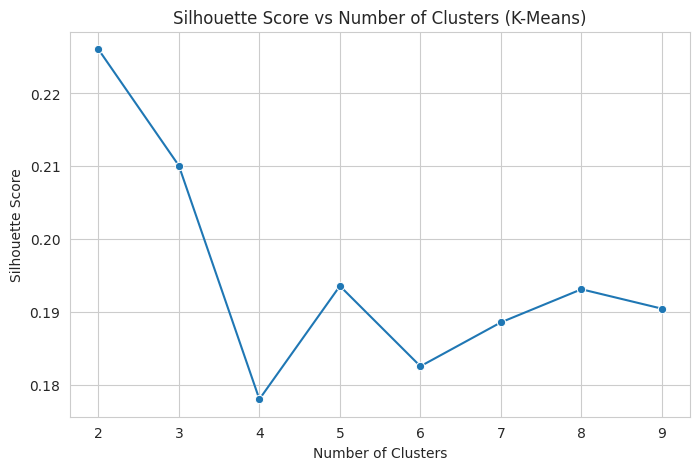

In [38]:
plt.figure(figsize=(8,5))
sns.lineplot(x=list(k_values), y = sil_scores, marker = "o")
plt.title("Silhouette Score vs Number of Clusters (K-Means)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [39]:
optimal_k = k_values[np.argmax(sil_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["cluster_kmeans"] = kmeans.fit_predict(X_scaled)

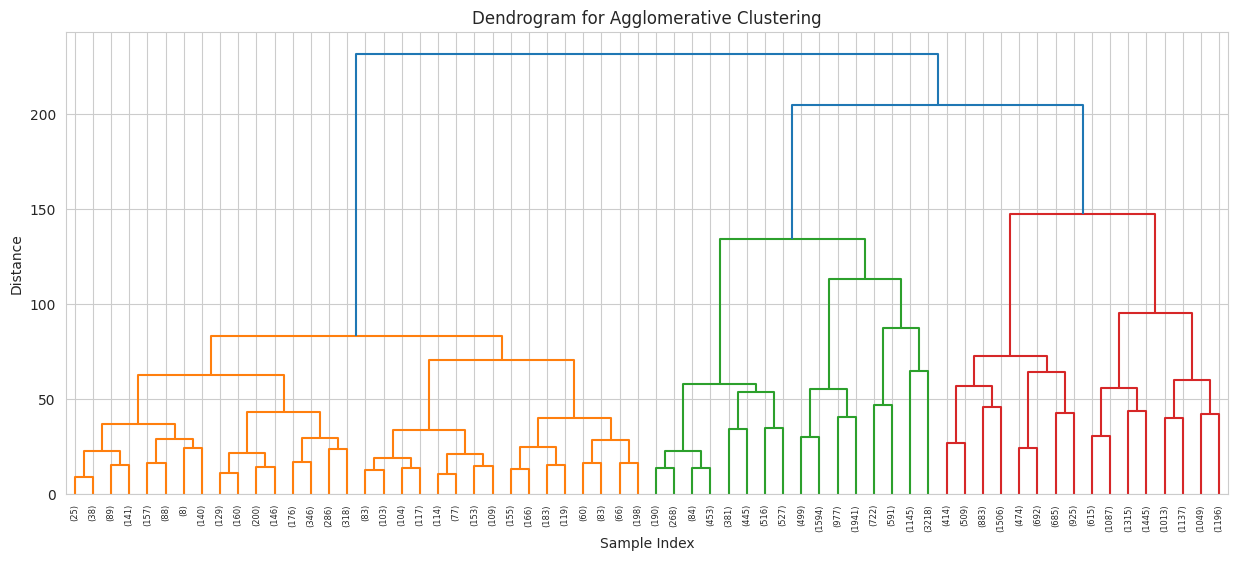

In [40]:
plt.figure(figsize=(15,6))
linkage_matrix = linkage(X_scaled, method="ward")
dendrogram(linkage_matrix, truncate_mode="level", p = 5)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [41]:
agg = AgglomerativeClustering(n_clusters=optimal_k)
df["cluster_agg"] = agg.fit_predict(X_scaled)

Cluster Visualizations

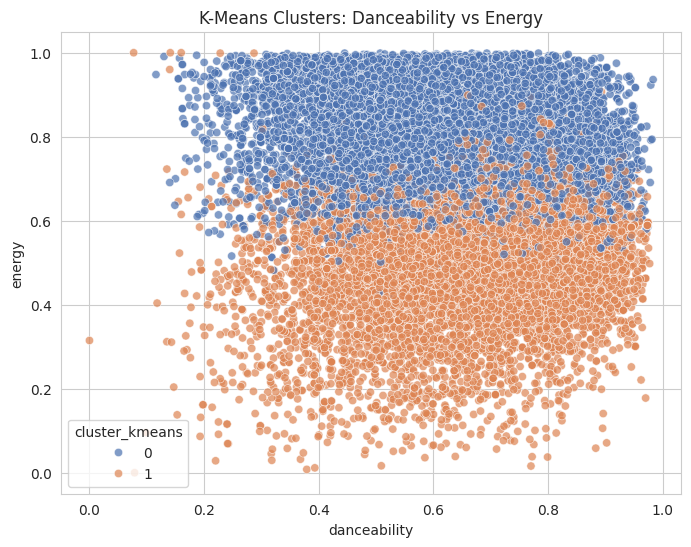

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="danceability",
    y="energy",
    hue="cluster_kmeans",
    palette="deep",
    alpha=0.7
)
plt.title("K-Means Clusters: Danceability vs Energy")
plt.show()

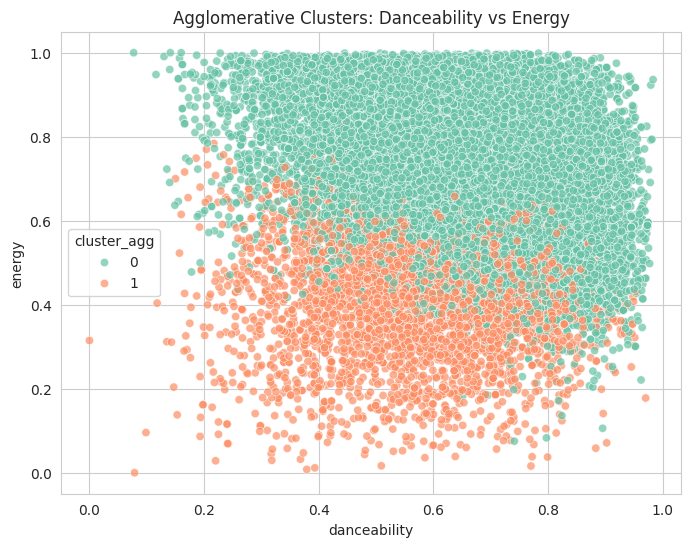

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="danceability",
    y="energy",
    hue="cluster_agg",
    palette="Set2",
    alpha=0.7
)
plt.title("Agglomerative Clusters: Danceability vs Energy")
plt.show()

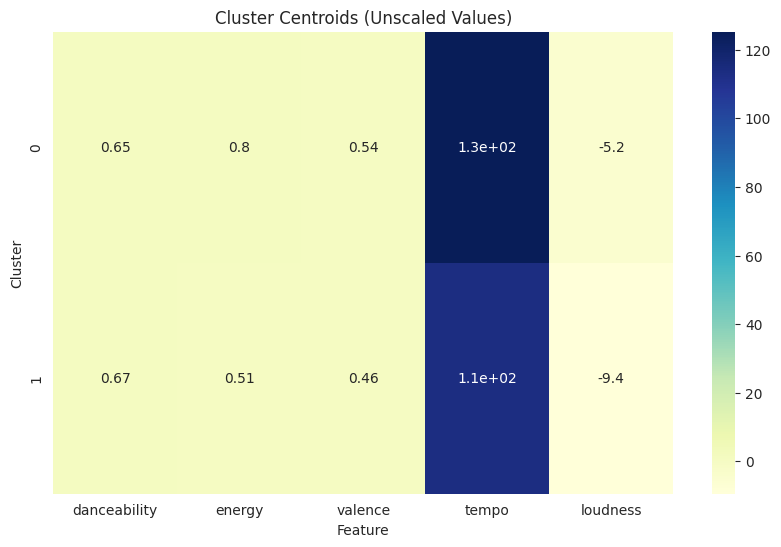

In [50]:
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=audio_features
)
plt.figure(figsize=(10,6))
sns.heatmap(centroids, annot=True, cmap="YlGnBu")
plt.title("Cluster Centroids (Unscaled Values)")
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.show()

In [43]:
print(df.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'cluster_kmeans', 'cluster_agg'],
      dtype='object')


/tmp/ipython-input-2006752967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="cluster_kmeans",y="valence",palette="pastel")


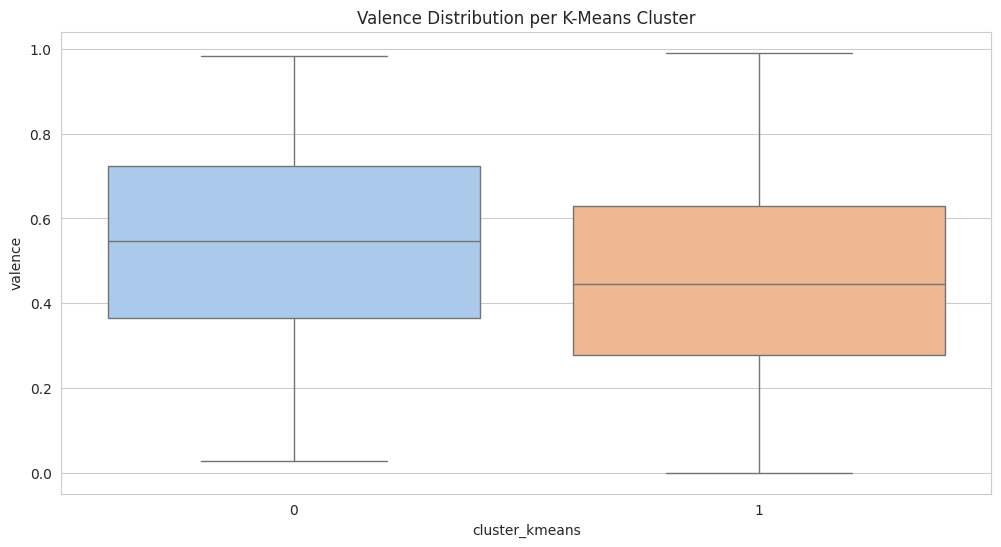

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="cluster_kmeans",y="valence",palette="pastel")
plt.title("Valence Distribution per K-Means Cluster")
plt.show()

**Storytelling (Clustering Analysis)**
Use this section to further analyze your clusters.

What information or insights does it tell you? What have you learned? Were you able to answer your initial problems/questions (if so, discuss that)?

**Impact Section**
Discuss the possible impact of your project. This can be socially, ethically, etc. It cannot be something like "our project has no impact" or "our project has no negative impact." Even the most well-intentioned projects *could* have a negative impact. We will not be checking for "right" or "wrong" answers, but showing your critical thinking.

**References**
Include any references.